In [2]:
# https://www.contextures.com/xlsampledata01.html#data
# get data
# make a table
# column bar chart for every item
# Line chart for every item in every month
# analyze the region

In [113]:
from bs4 import BeautifulSoup
import urllib.request, urllib.parse, urllib.error
import requests
import json
import ssl
import re # regular expression
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import display

In [4]:
url = "https://www.contextures.com/xlsampledata01.html#data"

In [5]:
page = requests.get(url)

In [9]:
soup = BeautifulSoup(page.content, 'html.parser')

In [12]:
para1 = soup.find_all('tr')

In [101]:
index = 0
table = list()

for item in para1:
    if index == 0:
        para2 = item.find_all('b')
    else:
        para2 = item.find_all('p')
    splitPara = str(para2).split(", ")
    para2 = str(para2)
    index = index + 1
    n = 0
    
    row = list()
    for data in splitPara:
        if n == 0:
            d = data[4:len(data)-4:1]
            if '\n' in d:
                d = d[0: d.find('\n'): 1]
        elif n == len(splitPara)-1:
            d = data[3:len(data)-5:1]
        else:
            d = data[3:len(data)-4:1]
        n = n + 1
        row.append(d)
    table.append(row)

In [102]:
df = pd.DataFrame(table)
header = df.iloc[0]
df = df[1:]
df.columns = header
display(df)

,OrderDate,Region,Rep,Item,Units,UnitCost,Total
1,1/6/2020,East,Jones,Pencil,95,1.99,189.05
2,1/23/2020,Central,Kivell,Binder,50,19.99,999.50
3,2/9/2020,Central,Jardine,Pencil,36,4.99,179.64
4,2/26/2020,Central,Gill,Pen,27,19.99,539.73
5,3/15/2020,West,Sorvino,Pencil,56,2.99,167.44
6,4/1/2020,East,Jones,Binder,60,4.99,299.40
7,4/18/2020,Central,Andrews,Pencil,75,1.99,149.25
8,5/5/2020,Central,Jardine,Pencil,90,4.99,449.10
9,5/22/2020,West,Thompson,Pencil,32,1.99,63.68
10,6/8/2020,East,Jones,Binder,60,8.99,539.40


In [105]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 1 to 43
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   OrderDate  43 non-null     object
 1   Region     43 non-null     object
 2   Rep        43 non-null     object
 3   Item       43 non-null     object
 4   Units      43 non-null     object
 5   UnitCost   43 non-null     object
 6   Total      43 non-null     object
dtypes: object(7)
memory usage: 2.5+ KB


In [145]:
itemGenre = list()
for item in table[1:]:
    if item[3] not in itemGenre:
        itemGenre.append(item[3])
print(itemGenre)

['Pencil', 'Binder', 'Pen', 'Desk', 'Pen Set']


In [146]:
pencilAmount = 0
binderAmount = 0
penAmount = 0
deskAmount = 0
pensetAmount = 0

for row in table:
    if row[3] == itemGenre[0]:
        pencilAmount = pencilAmount + int(row[4])
    if row[3] == itemGenre[1]:
        binderAmount = binderAmount + int(row[4])
    if row[3] == itemGenre[2]:
        penAmount = penAmount + int(row[4]) 
    if row[3] == itemGenre[3]:
        deskAmount = deskAmountAmount + int(row[4])
    if row[3] == itemGenre[4]:
        pensetAmount = pensetAmount + int(row[4])
itemAmo = [pencilAmount, binderAmount, penAmount, deskAmount, pensetAmount]
print (itemAmo)

[716, 722, 278, 6, 395]


[0 2 4 6 8]
['Pencil', 'Binder', 'Pen', 'Desk', 'Pen Set']


j:\pythonenvironment\venv\lib\site-packages\ipykernel_launcher.py:6: UserWarning: FixedFormatter should only be used together with FixedLocator
  


(array([0, 2, 4, 6, 8]),
 [Text(-2.0, 0, 'Pencil'),
  Text(0.0, 0, 'Binder'),
  Text(2.0, 0, 'Pen'),
  Text(4.0, 0, 'Desk'),
  Text(6.0, 0, 'Pen Set')])

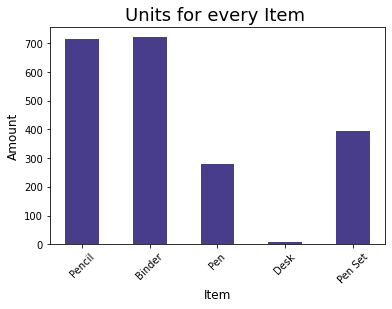

In [157]:
position = np.arange(0, len(itemAmo)*2, 2)
print(position)
fig, ax = plt.subplots(1)
ax.bar(position, itemAmo, width=1, color='darkslateblue' )
print(itemGenre)
ax.set_xticklabels(itemGenre)
ax.set_xticks(position)
ax.set_ylabel('Amount', fontsize=12) 
ax.set_xlabel('Item', fontsize=12)
plt.title('Units for every Item ', fontsize=18)
plt.xticks(rotation=45, fontsize=10)